<a href="https://colab.research.google.com/github/malick741/MACHINE-LEARNING/blob/main/Detection_Diabete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler


EDA

In [ ]:
df0=pd.read_csv('/content/drive/MyDrive/diabetes.csv')
df=df0.copy()


PREPROCESSING


In [ ]:
#NETTOYAGE ET FILTRAGE DE DONNEES //SUPPRESSION VALEUR ABERANTES
def make_process(df):
    
    df=df[df['Insulin']<500]
    df=df.drop_duplicates()
    df['SkinThickness']=df[df['SkinThickness']< 100]
    df['Glucose']=df[df['Glucose']> 1]
    df['BMI']=df[df['BMI']> 1]
    df['BloodPressure']=df[df['BloodPressure']> 1]
    df['Insulin']=df[df['Insulin']<= 400]
    df.dropna(inplace=True)
    return df

df=make_process(df0)
y=df['Outcome']
df.drop(['Outcome'],axis=1,inplace=True)


In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,6.0,6.0,6.0,6.0,6.0,0.627,50
1,1,1.0,1.0,1.0,1.0,1.0,0.351,31
2,8,8.0,8.0,8.0,8.0,8.0,0.672,32
3,1,1.0,1.0,1.0,1.0,1.0,0.167,21
4,0,0.0,0.0,0.0,0.0,0.0,2.288,33
...,...,...,...,...,...,...,...,...
763,10,10.0,10.0,10.0,10.0,10.0,0.171,63
764,2,2.0,2.0,2.0,2.0,2.0,0.340,27
765,5,5.0,5.0,5.0,5.0,5.0,0.245,30
766,1,1.0,1.0,1.0,1.0,1.0,0.349,47


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               704 non-null    int64  
 1   Glucose                   704 non-null    float64
 2   BloodPressure             704 non-null    float64
 3   SkinThickness             704 non-null    float64
 4   Insulin                   704 non-null    float64
 5   BMI                       704 non-null    float64
 6   DiabetesPedigreeFunction  704 non-null    float64
 7   Age                       704 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 49.5 KB


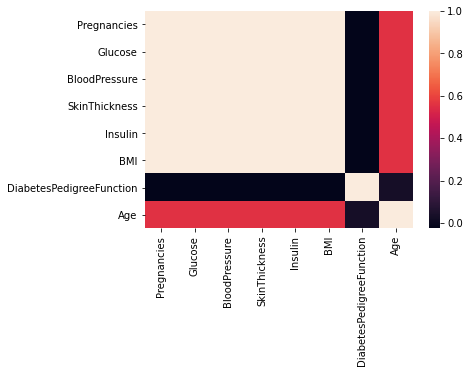

In [ ]:
#GRAPHE DE CORRELATION DES FEATURES
sns.heatmap(df.corr())

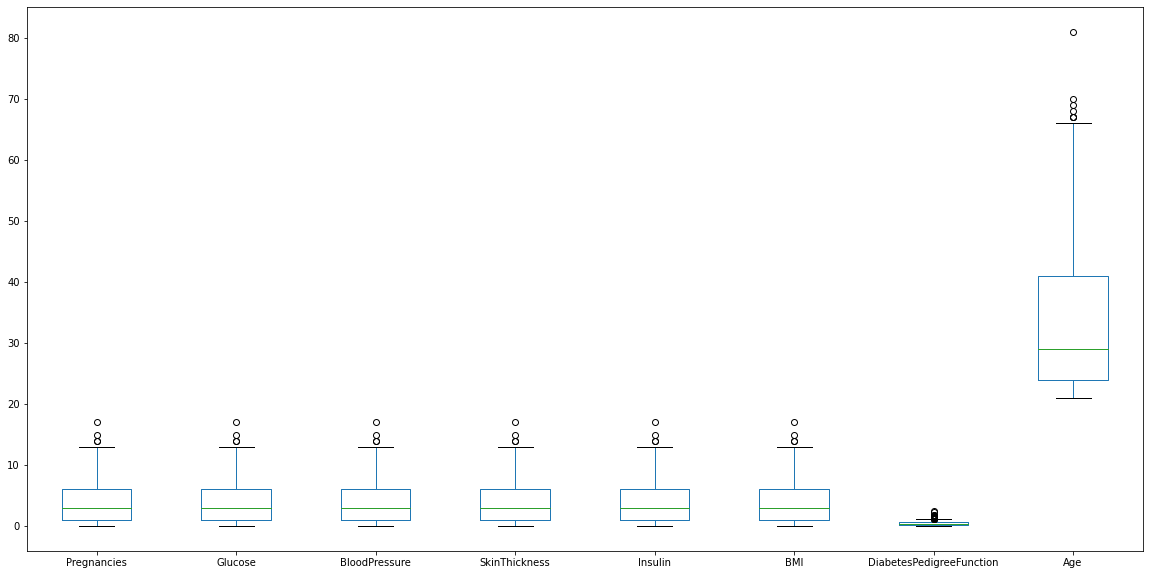

In [ ]:
df.plot.box(figsize=(20,10))

PROGRAMME ML

In [ ]:
#SEPARATION DU DONNEE EN TRAIN ET TEST
x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=0.2)

In [ ]:
#MODEL DE ML
dtc=DecisionTreeClassifier( max_depth = 15 )

In [ ]:
model=dtc.fit(x_train,y_train)

In [ ]:
model.score(x_train,y_train)

0.9893428063943162

In [ ]:
#FONCTION DE PREDICTION
def programm(model1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age):
    x=np.array([Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,
       BMI, DiabetesPedigreeFunction, Age]).reshape(1,8)
    predic=model1.predict(x)
    if predic==0:
        predic='Non diabetique'
    else:
        predic='Diabetique'
    return print('Vous etes :',predic)

In [ ]:
programm(model1,10,120,74,0,0,180,0,20)